# Change in Lake Level Data

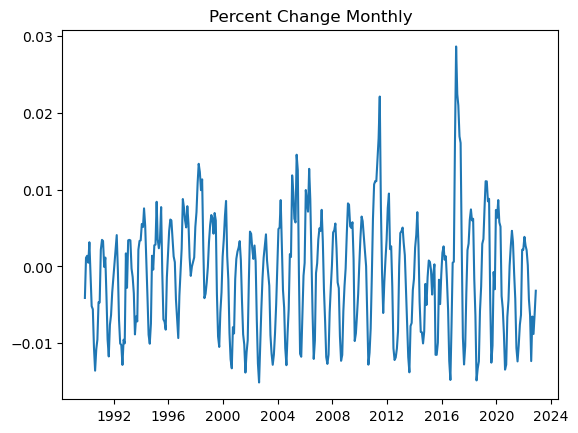

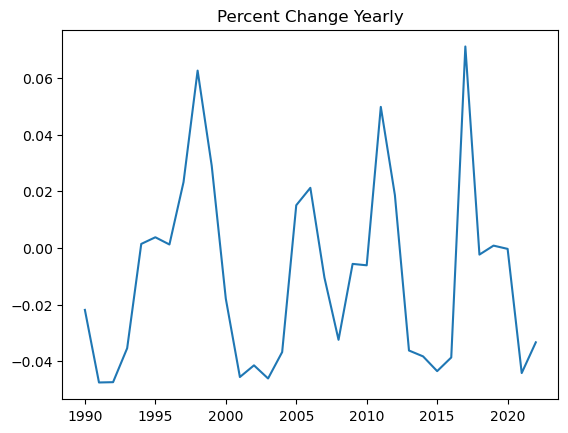

In [4]:
# Change in Lake Level Data
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

lake_levels = pd.read_csv('monthly', sep = '\t', comment = '#') 

# adding timestamp to level readings
def populate_lake_datetime(data, df):
    for i in range(len(data)-1):
        temp = pd.DataFrame([[dt.date(int(data['year_nu'][i+1]),int(data['month_nu'][i+1]),20), float(data['mean_va'][i+1])]],columns=['date','lake_level'])
        df = pd.concat([df,temp], ignore_index=True)
    return df

lk_lvl = pd.DataFrame(columns=['date','lake_level'])
lk_lvl = populate_lake_datetime(lake_levels, lk_lvl)

# Percent change and derivative look the exact same, just different numbers
pct_chng = lk_lvl['lake_level'].pct_change()*100 # % change between data points
plt.plot(lk_lvl['date'], pct_chng)
plt.title("Percent Change Monthly")
plt.show()

# Group by yearly average instead of month
lk_lvl["date"] = pd.to_datetime(lk_lvl["date"]) # idk why I need to do this but I do
yearly = lk_lvl.groupby(lk_lvl['date'].dt.year).agg('mean')
pct_chng_yr = yearly['lake_level'].pct_change()*100 # % change between data points
plt.plot(yearly.index, pct_chng_yr)
plt.title("Percent Change Yearly")
plt.show()